# Clustering

## K nearest neighbours
Description
- points that are close together are often in the same cluster
- find some value k
- this value denotes the number of nearest neighbours to a certain point you are looking at
- measure the distance of this point to the k other points
 - usually euclidian distance
- can either do classification or regression???
  - explore regression more in **next cell**
- classification: will assign a discrete class to the point in question based on the classes of the k nearest neighbours to that class
  - usually the one the majority of the neighbours belong to
- there is no training phase
- the training is a labelled set, you are introducing one new point to this already labelled set in the same dimensions/domain


### an aside about knn and regression
- a new point stil look at its k nearest neighbours
- it is given X values perhaps and needs to estimate through knn regressions the y value (or in higher dimensions X is some highger dimension vector)
- to estimate y it takes the average of all k nearest neighbour y values (possibly taking in weighted average with distance)
  - make sure you invert the weight and distance
  - so that points closer have higher weights!

Let's play around with customer personality dataset from kaggle

In [26]:
# !pip install -q kaggle
# from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
'''
%mkdir ~/.kaggle
%cp kaggle.json ~/.kaggle/
%chmod 600 ~/.kaggle/kaggle.json
%kaggle datasets download -d imakash3011/customer-personality-analysis
'''


  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 44.5MB/s]


In [ ]:
# !unzip /content/customer-personality-analysis.zip

Archive:  /content/customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


In [50]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
print(df.head(3))
columns = df.columns
print(columns)

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         

visualizing the data

unqiue values dont tell us much for the numerical columns so we need further exploration with that but we can make some plots for the discrete, non numerical values

In [20]:
#look at all unque values in each column
labels = []
for names in columns:
    labels.append(df[names].unique())
    print(names, df[names].unique()[:10])

ID [5524 2174 4141 6182 5324 7446  965 6177 4855 5899]
Year_Birth [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950]
Education ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Income [58138. 46344. 71613. 26646. 58293. 62513. 55635. 33454. 30351.  5648.]
Kidhome [0 1 2]
Teenhome [0 1 2]
Dt_Customer ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014']
Recency [58 38 26 94 16 34 32 19 68 11]
MntWines [635  11 426 173 520 235  76  14  28   5]
MntFruits [88  1 49  4 43 42 65 10  0  5]
MntMeatProducts [546   6 127  20 118  98 164  56  24  11]
MntFishProducts [172   2 111  10  46   0  50   3   1  11]
MntSweetProducts [ 88   1  21   3  27  42  49   2 112   5]
MntGoldProds [88  6 42  5 15 14 27 23  2 13]
NumDealsPurchases [ 3  2  1  5  4 15  7  0  6  9]
NumWebPurchases [ 8  1  2  5  6  7  4  3 11  0]
NumCatalogPurchases [10  

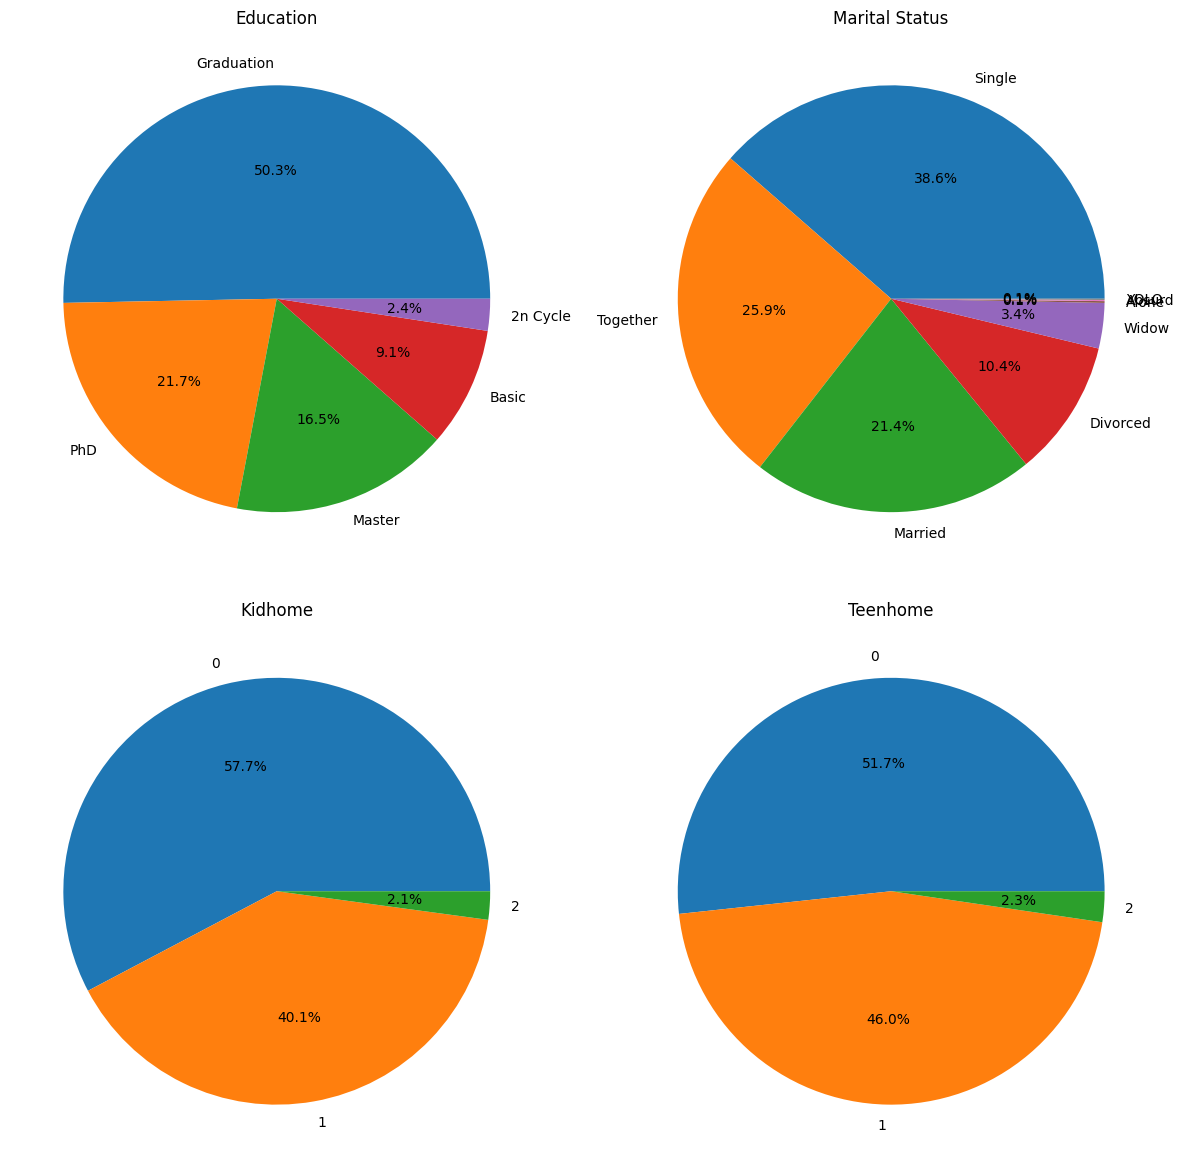

In [22]:
#lets visualize some of the distributions
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0, 0].pie(df['Education'].value_counts(), labels=labels[2], autopct='%1.1f%%')
axs[0, 0].set_title('Education')

axs[0, 1].pie(df['Marital_Status'].value_counts(), labels=labels[3], autopct='%1.1f%%')
axs[0, 1].set_title('Marital Status')

axs[1, 0].pie(df['Kidhome'].value_counts(), labels=labels[5], autopct='%1.1f%%')
axs[1, 0].set_title('Kidhome')

axs[1, 1].pie(df['Teenhome'].value_counts(), labels=labels[6], autopct='%1.1f%%')
axs[1, 1].set_title('Teenhome')


plt.tight_layout()
plt.show()


cleaning the data

In [107]:
df_clean = df.copy()
df_clean.drop('ID', inplace=True, axis=1)
print(df_clean.head)


<bound method NDFrame.head of       Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumWebVisitsMont

need to covnert some entries that are not numerical into some numerical representation

the date is tricky, i will need to find the earliest date and work relative to that

In [108]:
## converting string dates to datetime format
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'])
print(df_clean['Dt_Customer'])
earliest_date = df['Dt_Customer'].min()
print("earliest date: ", earliest_date)


0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]
earliest date:  2012-07-30 00:00:00


In [109]:
columns = df_clean.columns  
label_encoder = LabelEncoder()

for name in columns:
    if name == 'Dt_Customer':
        df_clean[name] = (df_clean[name] - earliest_date).dt.days
    elif df_clean[name].dtype not in ['int64', 'float64']:
        dummies = pd.get_dummies(df_clean[name], prefix=name, drop_first=True)
        dummies = dummies.astype(int)
        df_clean = pd.concat([df_clean.drop(name, axis=1), dummies], axis=1)


In [110]:
columns = df_clean.columns
labels = []
for names in columns:
    labels.append(df_clean[names].unique())
    print(names, df_clean[names].unique()[:10])

Year_Birth [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950]
Income [58138. 46344. 71613. 26646. 58293. 62513. 55635. 33454. 30351.  5648.]
Kidhome [0 1 2]
Teenhome [0 1 2]
Dt_Customer [ 36 586 387 560 538 406 106 282 311 591]
Recency [58 38 26 94 16 34 32 19 68 11]
MntWines [635  11 426 173 520 235  76  14  28   5]
MntFruits [88  1 49  4 43 42 65 10  0  5]
MntMeatProducts [546   6 127  20 118  98 164  56  24  11]
MntFishProducts [172   2 111  10  46   0  50   3   1  11]
MntSweetProducts [ 88   1  21   3  27  42  49   2 112   5]
MntGoldProds [88  6 42  5 15 14 27 23  2 13]
NumDealsPurchases [ 3  2  1  5  4 15  7  0  6  9]
NumWebPurchases [ 8  1  2  5  6  7  4  3 11  0]
NumCatalogPurchases [10  1  2  0  3  4  6 28  9  5]
NumStorePurchases [ 4  2 10  6  7  0  3  8  5 12]
NumWebVisitsMonth [ 7  5  4  6  8  9 20  2  3  1]
AcceptedCmp3 [0 1]
AcceptedCmp4 [0 1]
AcceptedCmp5 [0 1]
AcceptedCmp1 [0 1]
AcceptedCmp2 [0 1]
Complain [0 1]
Z_CostContact [3]
Z_Revenue [11]
Response [1 0]
Education_

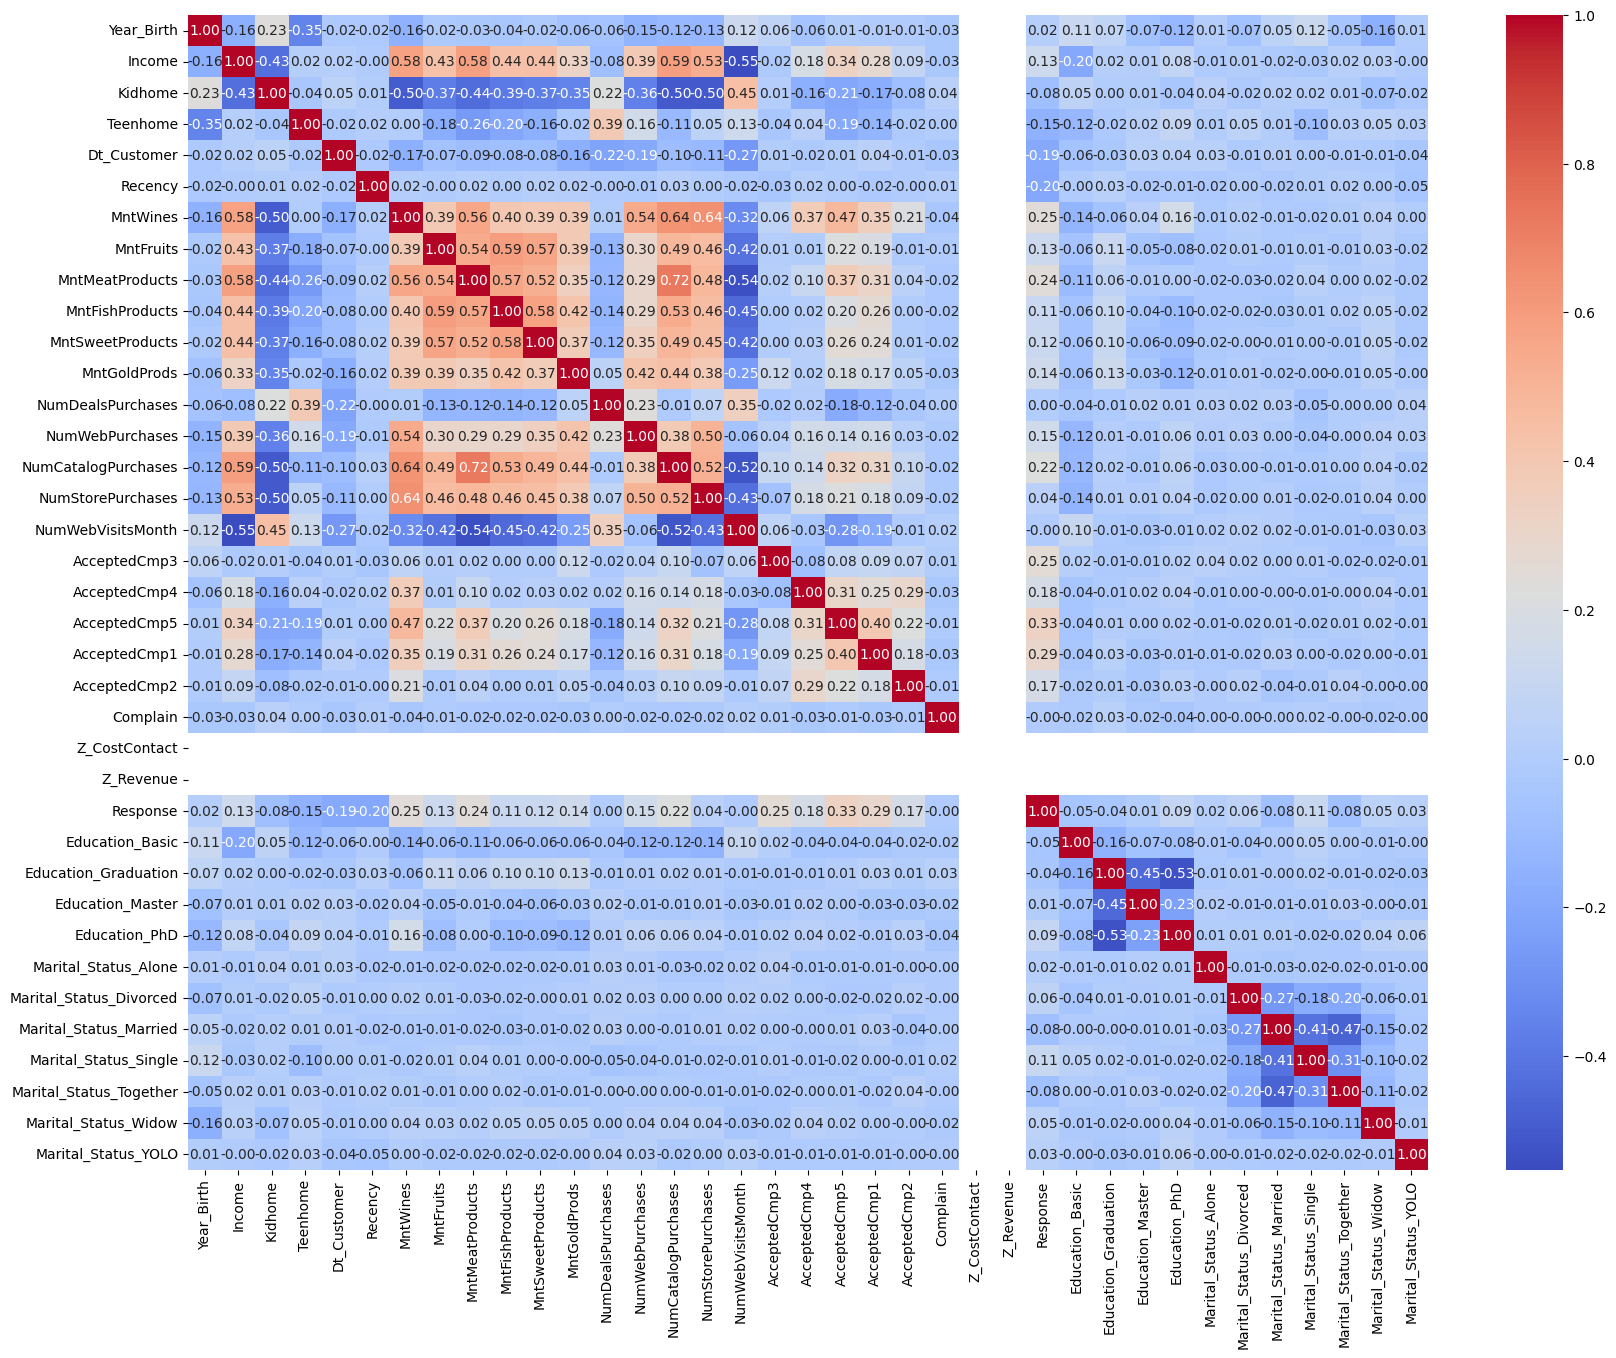

In [116]:
correlation_matrix = df_clean.corr()

# Set the size of the figure
plt.figure(figsize=(20, 15))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


calculate correlations -- find highest ones

need to create some scatter plots for certain axes